<a href="https://colab.research.google.com/github/cuboidandroid/neunet_training_on_tensor/blob/main/neunet_vs_tensorflow_on_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('gdrive/MyDrive/neunet')

In [ ]:
from neunet import NeuralNetwork

In [ ]:
my_net = NeuralNetwork([4,10,10,3], ['relu', 'relu', 'relu'])
print(my_net.weights)
print(my_net.betas)

[nan, array([[-0.60422581, -0.75968746,  0.86861246,  0.96874218],
       [ 0.88048845,  0.52457485,  0.93420187, -0.8405499 ],
       [-0.80005611, -0.95295353,  0.61736403, -0.50190149],
       [-0.38998053, -0.50058671,  0.84160678,  0.72869273],
       [ 0.27003402, -0.20764174,  0.93561201, -0.80923653],
       [ 0.1414986 , -0.07694714,  0.10166778, -0.02322295],
       [-0.74762364, -0.1266959 , -0.43930903,  0.06218266],
       [-0.62998592, -0.71948436, -0.36930598,  0.09488243],
       [-0.83136286, -0.37314471,  0.03392773,  0.99348651],
       [-0.79954384,  0.46999409, -0.46209379,  0.90578785]]), array([[ 0.96709437, -0.57029695,  0.3249792 , -0.00622804,  0.01619027,
        -0.17974419,  0.95179353, -0.76706887,  0.72246014, -0.53970922],
       [ 0.64787136,  0.62076121,  0.25365513, -0.28522694, -0.04250332,
        -0.70665312,  0.46092167,  0.91885179, -0.34680018,  0.45049566],
       [-0.61452206, -0.02048898, -0.0174658 ,  0.3308647 ,  0.203915  ,
        -0.7185

In [ ]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('iris')
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [ ]:
df.loc[137, :]

sepal_length          6.4
sepal_width           3.1
petal_length          5.5
petal_width           1.8
species         virginica
Name: 137, dtype: object

In [ ]:
df = pd.concat([df, pd.get_dummies(df['species'])], axis=1)
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,setosa,1,0,0
1,4.9,3.0,1.4,0.2,setosa,1,0,0
2,4.7,3.2,1.3,0.2,setosa,1,0,0


In [ ]:
X = df.iloc[:, 0:4]
y = df.loc[:, ['setosa', 'versicolor', 'virginica']]
print('features= ', list(X.columns), '\nlabels= ', list(y.columns))

features=  ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] 
labels=  ['setosa', 'versicolor', 'virginica']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Let the learning begin (SGD)

iteration 0 error before [37.52108632] error after [18.3315814]
iteration 5000 error before [0.06304379] error after [0.05405302]
iteration 10000 error before [0.40012009] error after [0.26887435]
iteration 15000 error before [0.69585762] error after [0.38438679]
iteration 20000 error before [0.02026721] error after [0.01724823]
iteration 25000 error before [0.00403627] error after [0.00373192]
iteration 30000 error before [0.02138151] error after [0.01975976]
iteration 35000 error before [0.00381383] error after [0.00328808]
iteration 40000 error before [0.01480273] error after [0.01266132]
iteration 45000 error before [0.00179877] error after [0.00125122]
iteration 50000 error before [0.00069118] error after [0.00059931]
iteration 55000 error before [0.12440826] error after [0.08552798]
iteration 60000 error before [0.00076659] error after [0.00057816]
iteration 65000 error before [0.50429842] error after [0.35979871]
iteration 70000 error before [0.00276983] error after [0.00256156]

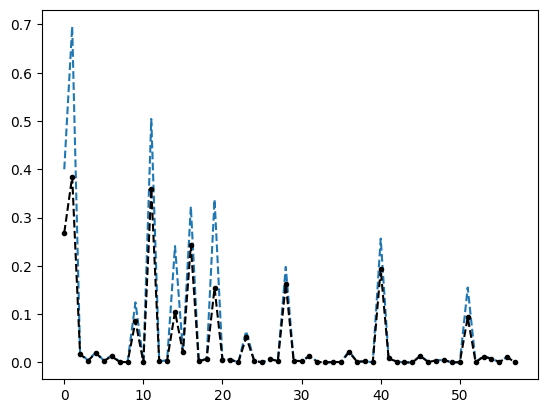

In [ ]:
my_net = NeuralNetwork([4,10,10,3], ['relu', 'relu', 'relu'])
learning_rate = 0.001
error_before = []
error_after = []
for u in range(300_000):
  i = np.random.choice(X_train.index)

  example = X_train.loc[i, :]
  label = y_train.loc[i, :]

  x = example.astype(float).to_numpy().reshape((4,1))
  y = label.astype(float).to_numpy().reshape((3,1))

  y_hat = my_net.forward_pass(x)
  deltas = my_net.backward_pass(y_hat, y)

  my_net.update_weights(y_hat, deltas, learning_rate)
  my_net.update_biases(deltas, learning_rate)

  y_hat2 = my_net.forward_pass(x)

  error_before.append(sum((y_hat[-1] - y)**2))
  error_after.append(sum((y_hat2[-1] - y)**2))

  if u % 5000 == 0:
      print(f'iteration {u} error before {sum((y_hat[-1] - y)**2)} error after {sum((y_hat2[-1] - y)**2)}')

plt.plot(error_before[10000::5000], '--')
plt.plot(error_after[10000::5000], 'k.--')

# Score on train data

In [ ]:
normalized_labels = []
normalized_predictions = []

for i in X_train.index:
    example = X_train.loc[i, :]
    label = y_train.loc[i, :]
    x = example.astype(float).to_numpy().reshape((4,1))
    y = label.astype(float).to_numpy().reshape((3,1))
    y_hat = my_net.forward_pass(x)
    normalized_label = [bool(x) for x in label.to_list()]
    normalized_prediction = list((y_hat[-1]==max(y_hat[-1])).ravel())
    normalized_labels.append(normalized_label)
    normalized_predictions.append(normalized_prediction)

acc = accuracy_score(normalized_labels, normalized_predictions)
print(acc)

0.9916666666666667


# Score on test data

In [ ]:

normalized_labels = []
normalized_predictions = []

for i in X_test.index:
    example = X_test.loc[i, :]
    label = y_test.loc[i, :]
    x = example.astype(float).to_numpy().reshape((4,1))
    y = label.astype(float).to_numpy().reshape((3,1))
    y_hat = my_net.forward_pass(x)
    normalized_label = [bool(x) for x in label.to_list()]
    normalized_prediction = list((y_hat[-1]==max(y_hat[-1])).ravel())
    normalized_labels.append(normalized_label)
    normalized_predictions.append(normalized_prediction)

acc = accuracy_score(normalized_labels, normalized_predictions)
print(acc)

1.0


In [ ]:
# from sklearn.metrics import multilabel_confusion_matrix
my_net.weights

[nan,
 array([[-0.48319987,  0.41591316, -0.07044323, -0.99685355],
        [-0.81087614, -0.57860047,  0.39396169, -0.90117737],
        [ 0.5638826 ,  0.8467719 , -0.05081161, -1.14810223],
        [-0.01039802, -0.15342518, -0.25208379,  0.84778692],
        [ 0.47420532, -0.62978649,  0.01484925, -0.9194056 ],
        [ 0.111348  , -0.48387328, -0.92028365,  0.94257403],
        [-0.80897088,  0.37587684,  0.35667661,  0.46884875],
        [ 0.05538118,  0.17503216, -0.92473204, -0.31564399],
        [ 0.4554186 , -0.22342288, -0.67715246, -0.78358952],
        [-0.04981807, -0.65897665,  1.15895974,  0.37481805]]),
 array([[ 0.17378608,  0.70474587,  0.7561494 , -0.22512714, -0.17892268,
          0.50401166, -0.29047226, -0.88847109, -0.17880598, -0.89783169],
        [ 0.80253799,  0.12033352,  0.31854551, -0.33801822,  0.20865268,
          0.90668734,  0.87451028,  0.28510901, -0.62295971, -0.94479099],
        [ 0.39748642, -0.60192985, -0.35253469, -0.71456511, -0.6166439 ,


In [ ]:
my_net.betas

[nan,
 array([[ 0.99063854],
        [-0.26634278],
        [-0.07575106],
        [-0.80920222],
        [ 0.51864243],
        [ 0.12011053],
        [ 0.2011714 ],
        [ 0.04175298],
        [-0.78152585],
        [-0.69968366]]),
 array([[ 0.45023934],
        [ 0.59338854],
        [ 0.97957647],
        [-0.80034522],
        [-0.12496914],
        [-0.83633814],
        [ 0.77405598],
        [ 0.42949554],
        [ 0.08142963],
        [-0.86663627]]),
 array([[-0.36941464],
        [ 1.14876922],
        [-0.06305612]])]

In [ ]:
# multilabel_confusion_matrix(np.array(normalized_labels), np.array(normalized_predictions), labels=['setosa', 'versicolor', 'virginica'])

In [ ]:
normalized_labels

[[False, False, True],
 [False, True, False],
 [True, False, False],
 [False, False, True],
 [True, False, False],
 [False, False, True],
 [True, False, False],
 [False, True, False],
 [False, True, False],
 [False, True, False],
 [False, False, True],
 [False, True, False],
 [False, True, False],
 [False, True, False],
 [False, True, False],
 [True, False, False],
 [False, True, False],
 [False, True, False],
 [True, False, False],
 [True, False, False],
 [False, False, True],
 [False, True, False],
 [True, False, False],
 [True, False, False],
 [False, False, True],
 [True, False, False],
 [True, False, False],
 [False, True, False],
 [False, True, False],
 [True, False, False]]

In [ ]:
normalized_predictions

[[False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True],
 [False, False, True]]

In [ ]:
! cd gdrive

In [ ]:
import os
os.listdir('gdrive')

['.shortcut-targets-by-id', '.file-revisions-by-id', 'MyDrive', '.Trash-0']

In [ ]:
import pickle
with open('/content/gdrive/MyDrive/iris_estim.pkl', 'wb') as f:
    pickle.dump(my_net, f)

In [ ]:
with open('/content/gdrive/MyDrive/iris_estim.pkl', 'rb') as f:
    loaded_net = pickle.load(f)

print(loaded_net.weights)
print(loaded_net.betas)

[nan, array([[-0.48319987,  0.41591316, -0.07044323, -0.99685355],
       [-0.81087614, -0.57860047,  0.39396169, -0.90117737],
       [ 0.5638826 ,  0.8467719 , -0.05081161, -1.14810223],
       [-0.01039802, -0.15342518, -0.25208379,  0.84778692],
       [ 0.47420532, -0.62978649,  0.01484925, -0.9194056 ],
       [ 0.111348  , -0.48387328, -0.92028365,  0.94257403],
       [-0.80897088,  0.37587684,  0.35667661,  0.46884875],
       [ 0.05538118,  0.17503216, -0.92473204, -0.31564399],
       [ 0.4554186 , -0.22342288, -0.67715246, -0.78358952],
       [-0.04981807, -0.65897665,  1.15895974,  0.37481805]]), array([[ 0.17378608,  0.70474587,  0.7561494 , -0.22512714, -0.17892268,
         0.50401166, -0.29047226, -0.88847109, -0.17880598, -0.89783169],
       [ 0.80253799,  0.12033352,  0.31854551, -0.33801822,  0.20865268,
         0.90668734,  0.87451028,  0.28510901, -0.62295971, -0.94479099],
       [ 0.39748642, -0.60192985, -0.35253469, -0.71456511, -0.6166439 ,
         0.6214

In [ ]:
example_setosa = np.array([[5.1,	3.5,	1.4,	0.2]]).reshape((4,1))
loaded_net.forward_pass(example_setosa)

[array([[5.1],
        [3.5],
        [1.4],
        [0.2]]),
 array([[0.        ],
        [0.        ],
        [5.46299517],
        [0.        ],
        [0.56974467],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[4.4791396 ],
        [2.45247986],
        [0.        ],
        [1.91505871],
        [0.68212326],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]]),
 array([[1.01772757],
        [0.        ],
        [0.        ]])]

In [ ]:
!ls

gdrive	iris_estim.pkl	sample_data


In [ ]:
!pwd

/content
